이번에는 이전에 로지스틱 회귀를 할 때 사용했던 분류에 적합한 iris 데이터셋을 사용하겠습니다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = pd.DataFrame(iris.target, columns=['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


데이터셋이 다 준비되었으니 결정 트리를 만들어보겠습니다.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

sklearn.tree.DecisionTreeClassifier를 이용하면 결정 트리 모델을 만들 수 있습니다.

여러 옵셔널 파라미터를 이용해서 다양한 설정이 가능한데,<br>
이번에는 max_depth만 써보겠습니다.

max_depth에 숫자를 넘겨주면 결정 트리의 최대 깊이를 지정해서 만들 수 있습니다.

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=4)

학습 시키는 것은 다른 모델과 똑같습니다.

In [7]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [8]:
tree_clf.predict(X_test)

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

평가하는 건 예측한 것 중에 몇%나 분류가 제대로 됐는지를 확인하면 되는데,<br>
로지스틱 회귀를 다뤘을 때와 똑같이 평가하겠습니다.

In [9]:
tree_clf.score(X_test, y_test)

0.9

이 모델이 약 90% 확률로 제대로 분류를 함을 알 수 있습니다.

결정 트리를 이용하면 각 속성이 얼마나 중요한지를 구할 수 있는데,<br>
feature_importances_ 를 확인해보면 각 속성의 중요도를 알 수 있습니다.

In [10]:
importances = tree_clf.feature_importances_
importances

array([0.02378049, 0.        , 0.54764808, 0.42857143])

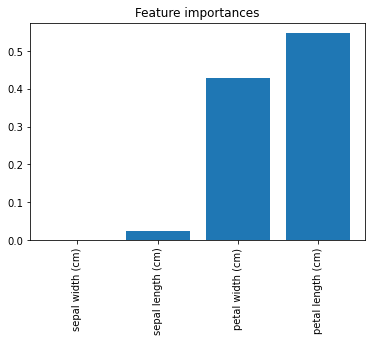

In [11]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title('Feature importances')
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

petal width가 가장 중요하게 사용된다는 것을 알 수 있습니다.

export_graphviz()를 사용해 그래프 정의를 dot 파일로 출력해<br>
훈련된 트리를 시각화할 수 있습니다.

In [12]:
from sklearn.tree import export_graphviz

In [13]:
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    rounded=True,
    filled=True
)

이 dot파일을 dot 명령어로 pdf나 png 이미지로 바꿉니다.

In [14]:
! dot -Tpng iris_tree.dot -o iris_tree.png

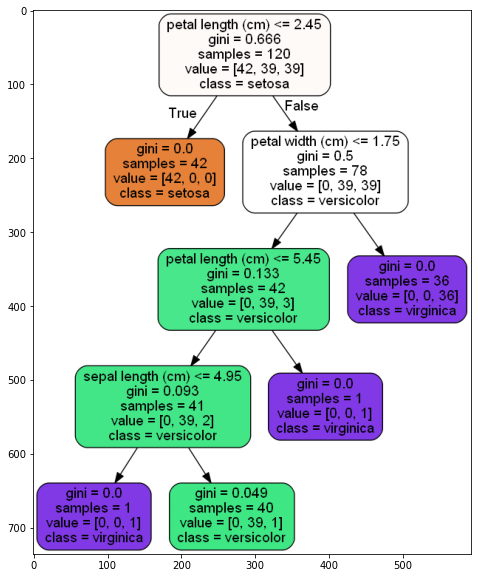

In [15]:
import matplotlib.image as mpimg

img = mpimg.imread('iris_tree.png')
plt.figure(figsize=(8, 10))
plt.imshow(img)
plt.show()